In [16]:
import pandas as pd #trabajar con dataframes
import os #Para trabajar con cosas del sistema
import matplotlib.pyplot as plt #plotea
import numpy as np #cosas numericas
from scipy.optimize import curve_fit #para fitear
from scipy.stats import norm  #para obtener datos de una distribucion normal

plt.style.use(['science', 'notebook', 'grid'])

In [53]:
file3 = "D3W.csv"
file5 = "D5W.csv"
file4 = "D4W.xlsx"
file5b = "D5WB.xlsx"
rawData3 = pd.read_csv(file3)
rawData5 = pd.read_csv(file5)
rawData4 = pd.read_excel(file4)
rawData5b = pd.read_excel(file5b)
dist = np.array([ 0.90, 0.70, 0.50, 0.30, 0.102, 0.03])
distl= np.array([ 0.70, 0.30, 0.03])
a =  ((np.pi) /4) * (0.0267)**2


0.000559902496704407


In [27]:


rawData3

,t,7,6,5,2,1,3,4
0,0,20.2,11.0,12.8,15.3,15.3,14.6,13.7
1,5,20.2,10.9,12.7,16.8,17.7,14.9,13.5
2,10,20.3,10.8,12.6,17.6,18.5,15.5,13.8
3,15,20.3,10.9,12.7,18.2,19.1,15.9,14.0
4,20,20.3,10.8,12.7,18.7,19.7,16.2,14.2
5,25,20.2,10.9,12.9,18.9,20.0,16.5,14.4
6,30,20.2,10.9,13.0,19.3,20.4,16.8,14.6
7,35,20.2,10.9,13.1,19.6,20.6,17.1,14.9
8,40,20.1,10.8,13.2,20.0,20.9,17.4,15.1
9,45,20.1,10.9,13.3,20.1,21.2,17.6,15.2


Lineal
m -12.842141425882838 +- 0.204624836953855
b 568.4860503483892 +- 0.10734854640210027
k 395.5859127877965 +- 12.229035277819202
d 114.67587917085937 +- 3.55757316802319
delta 2.749587737089998 +- 0.08500300745041142


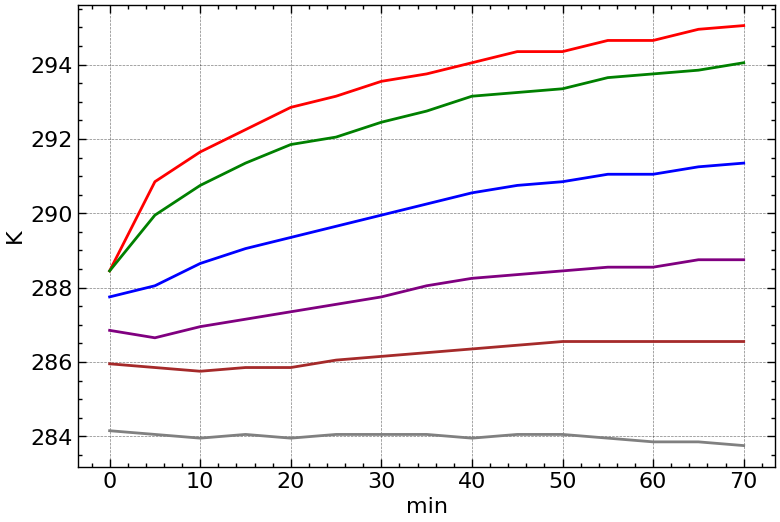

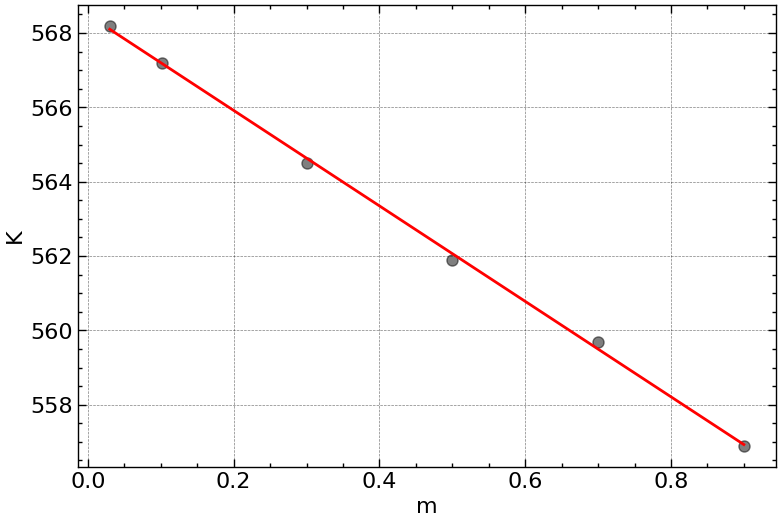

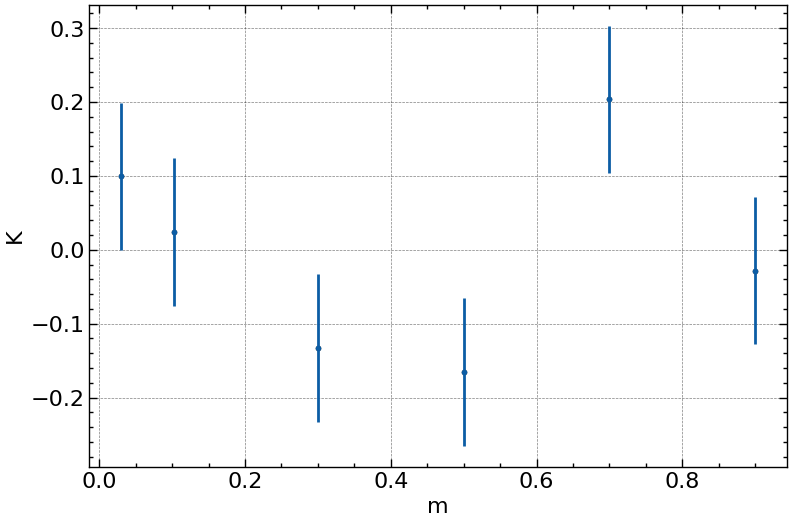

In [68]:
def lineal(x,m,b):
    return x*m+b

#   3W

p7 = rawData3 ['7'] + 273.15
p6 = rawData3 ['6'] + 273.15
p5 = rawData3 ['5'] + 273.15
p4 = rawData3 ['4'] + 273.15
p3 = rawData3 ['3'] + 273.15
p2 = rawData3 ['2'] + 273.15
p1 = rawData3 ['1'] + 273.15
dom = rawData3 ['t']
l = np.array([ p6[14], p5[14], p4[14], p3[14], p2[14], p1[14]])+273.15

popt, pcov = curve_fit(lineal, dist, l)
dest = np.sqrt(np.diag(pcov))


fig1, ax1 = plt.subplots(1,1,figsize=(9,6))
fig2, ax2 = plt.subplots(1,1,figsize=(9,6))
fig3, ax3 = plt.subplots(1,1,figsize=(9,6))

ax1.set_ylabel('K')
ax1.set_xlabel('min')
ax1.plot(dom, p1 , color='red')
ax1.plot(dom, p2 , color='green')
ax1.plot(dom, p3 , color='blue')
ax1.plot(dom, p4 , color='purple')
ax1.plot(dom, p5 , color='brown')
ax1.plot(dom, p6 , color='grey')

ax2.set_ylabel('K')
ax2.set_xlabel('m')
ax2.plot(dist, l,'o', color='black', alpha = 0.50, markersize=8,)
ax2.plot(dist, lineal(dist, *popt), color='red')
#ax1.plot(dom, p7 , color='black')

ax3.set_ylabel('K')
ax3.set_xlabel('m')
res = l - lineal(dist, *popt)
ax3.plot(dist, res, 'k.')
ax3.errorbar(dist, res, yerr=0.1, fmt='.')


#Propagacion de errores
k = np.abs((1/popt[0]) * (2.8444/a))
destk = k *np.sqrt((dest[0]/popt[0])**2+(2*0.0001/0.0267)**2+(2*0.1/8)**2 + (0.1/22)**2)
d = (k/(8960*385)) * (1000**2)
destd = d * np.sqrt((destk/k)**2 + (1/8960)**2 + (1/385)**2)

#delta
delta = ((k/385)-1)*100
destdelta = delta * np.sqrt((destk/k)**2 + (0.1/385)**2)

print('Lineal')
print ('m', popt[0],'+-', dest[0])
print ('b', popt[1],'+-', dest[1])
print ('k',k,'+-', destk)
print ('d',d,'+-', destd)
print ('delta',delta,'+-', destdelta)

fig1.savefig('LinealSubida.pdf')
fig2.savefig('LinealAjuste.pdf')
fig3.savefig('Residuos.pdf')






In [20]:
rawData5

,t,7,6,5,4,3,2,1
0,0,11.1,10.7,13.7,21.6,22.6,18.7,16.1
1,5,11.2,10.8,13.7,22.8,24.6,19.2,16.3
2,10,11.3,10.8,13.8,23.8,25.5,19.8,16.5
3,15,11.3,10.8,14.0,24.3,26.0,20.2,16.7
4,20,11.3,10.9,14.0,24.8,26.5,20.6,17.0
5,25,11.3,11.0,14.3,25.3,27.1,21.1,17.4
6,30,11.3,11.0,14.4,25.6,27.4,21.5,17.6
7,35,11.0,11.0,14.6,26.0,27.7,21.8,17.8
8,40,11.0,11.0,14.7,26.4,28.1,22.1,18.2
9,45,10.9,11.0,14.8,26.6,28.4,22.3,18.3


m -20.6290322865723 +- 0.4109694012057445
b 575.5887849582674 +- 0.21559935806617836
k -432.89118732485525


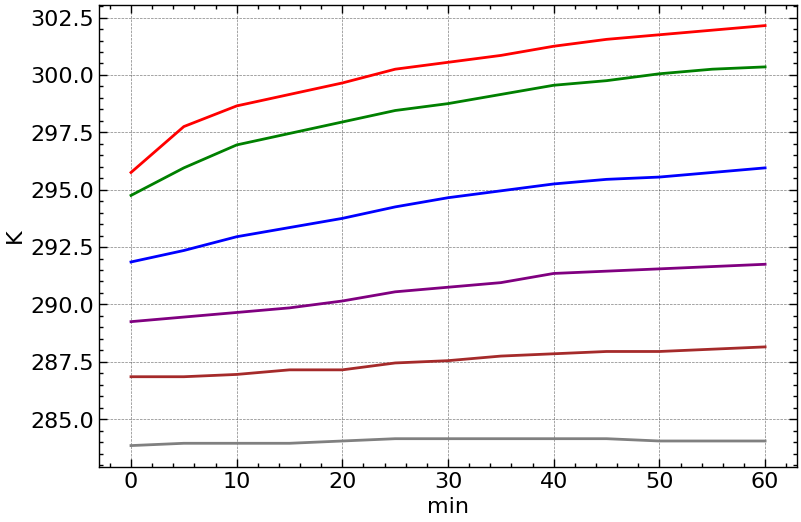

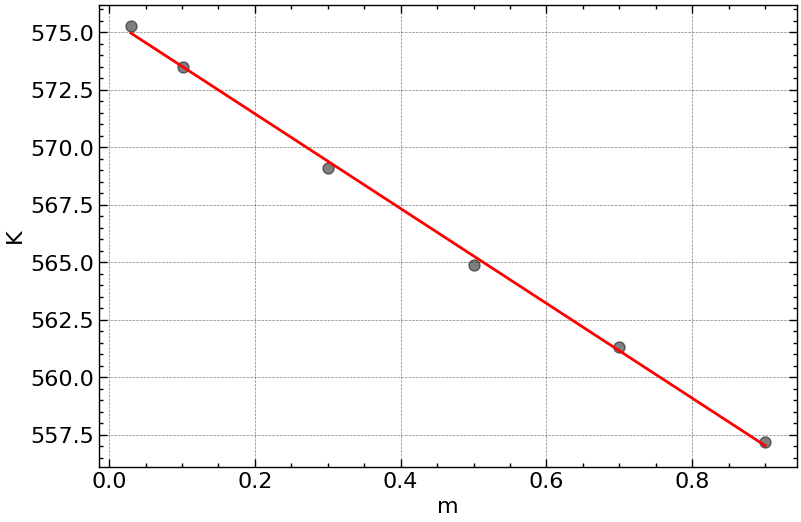

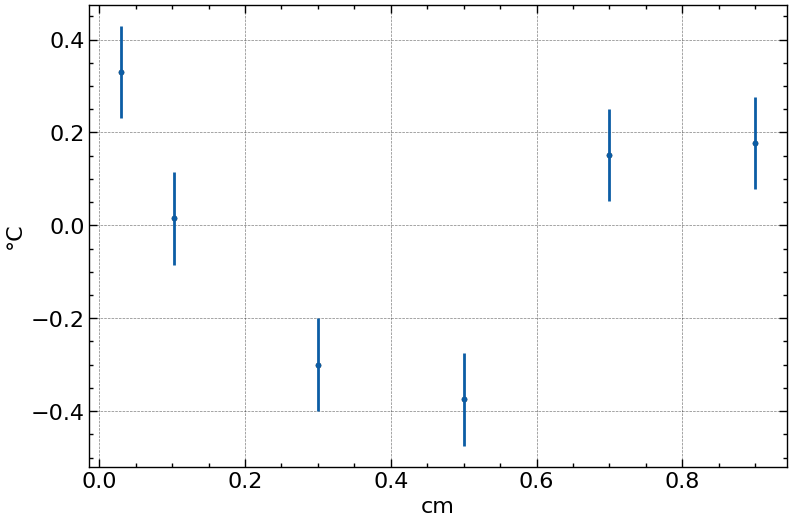

In [48]:
from turtle import color


def lineal(x,m,b):
    return x*m+b

#   5W----------------------------------------------------------------
    
a7 = rawData5 ['7'] + 273.15
a6 = rawData5 ['6'] + 273.15
a5 = rawData5 ['5'] + 273.15
a4 = rawData5 ['1'] + 273.15
a3 = rawData5 ['2'] + 273.15
a2 = rawData5 ['4'] + 273.15
a1 = rawData5 ['3'] + 273.15
dom = rawData5 ['t']
l5 = np.array([ a6[12], a5[12], a4[12], a3[12], a2[12], a1[12]]) + 273.15

popt, pcov = curve_fit(lineal, dist, l5)
dest = np.sqrt(np.diag(pcov))

fig1, ax1 = plt.subplots(1,1,figsize=(9,6))
fig2, ax2 = plt.subplots(1,1,figsize=(9,6))
fig3, ax3 = plt.subplots(1,1,figsize=(9,6))

ax1.set_ylabel('K')
ax1.set_xlabel('min')
ax1.plot(dom, a1 , color='red')
ax1.plot(dom, a2 , color='green')
ax1.plot(dom, a3 , color='blue')
ax1.plot(dom, a4 , color='purple')
ax1.plot(dom, a5 , color='brown')
ax1.plot(dom, a6 , color='grey')

ax2.set_ylabel('K')
ax2.set_xlabel('m')
ax2.plot(dist, l5,'o', color='black' , alpha=0.5, markersize=8)
ax2.plot(dist, lineal(dist, *popt), color='red')
#ax2.errorbar(dist, l5, yerr=0.1, fmt='.')
#ax1.plot(dom, a7 , color='black')
L5 = popt



#RESIDUOS
ax3.set_ylabel('°C')
ax3.set_xlabel('cm')
res = l5 - lineal(dist, *popt)
ax3.plot(dist, res, 'k.')
ax3.errorbar(dist, res, yerr=0.1, fmt='.')

print ('m', popt[0],'+-', dest[0])
print ('b', popt[1],'+-', dest[1])
print ('k',(1/popt[0]) * (5/a))

In [22]:
rawData4

,t,7,5,3,1
0,0,13.9,15.2,16.2,16.7
1,4,13.8,15.0,16.6,19.7
2,8,13.9,15.1,17.3,21.1
3,12,13.9,15.3,17.9,21.9
4,16,13.8,15.4,18.5,22.7
5,20,13.8,15.6,19.0,23.4
6,24,13.9,15.8,19.6,23.9
7,28,13.8,16.0,20.0,24.4
8,32,13.8,16.1,20.3,24.8
9,36,14.1,16.3,20.7,25.3


LINEAL
m -15.995893197098303 +- 1.1025365997938987
b 575.2252566643373 +- 0.4851580606950137
k 12.419658109842803
EXPONENCIAL
tau -38.43724059725533 +- 1.260769749655672
ti 292.1840949221909 +- 0.1075943476417855
tf 302.4900657408003 +- 0.11106813393392458


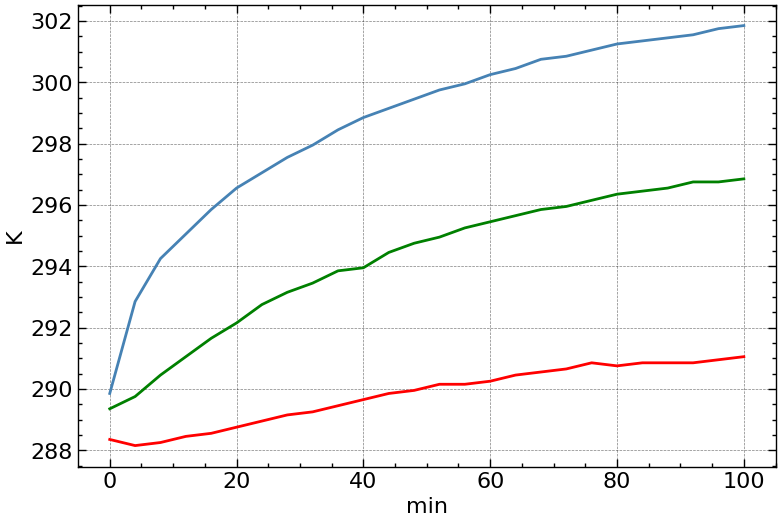

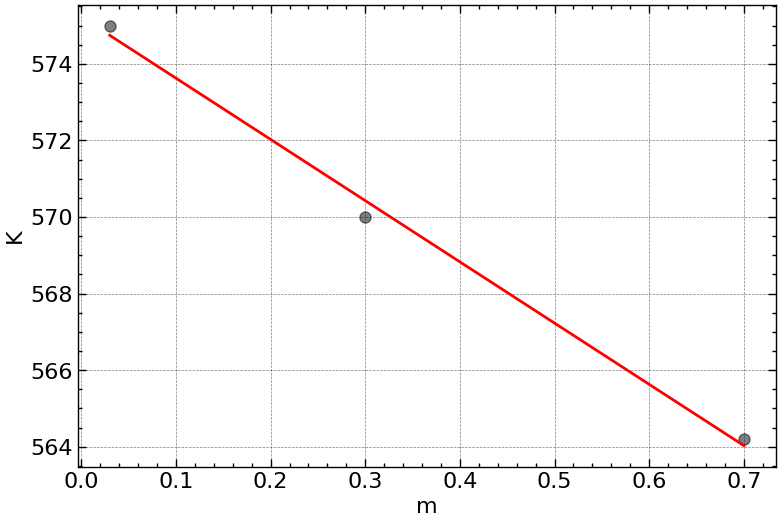

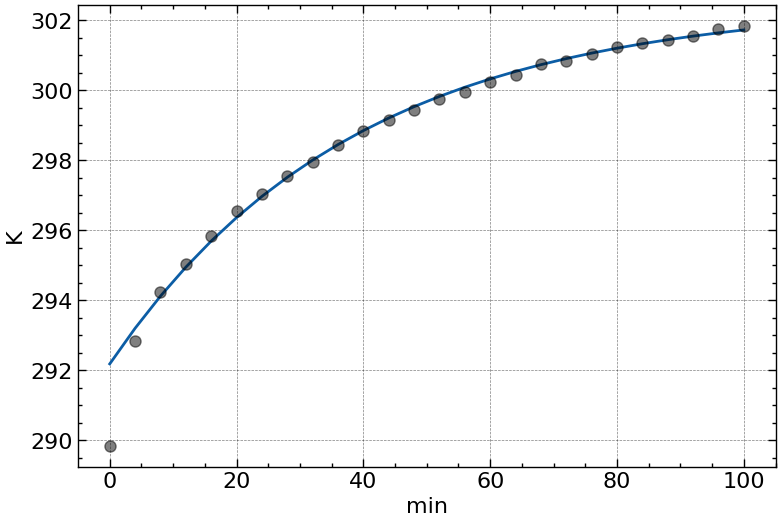

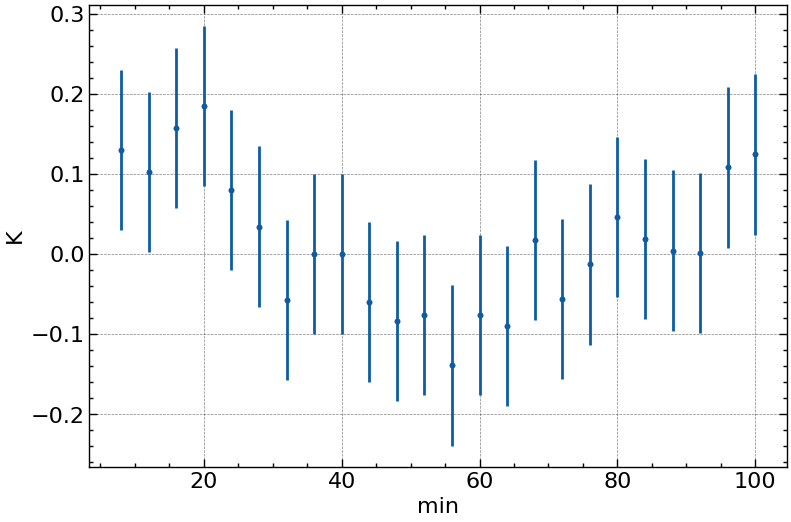

In [69]:
#   4W----------------------------------------------------------------

def expon(x, tau, ti , tf):
    return (( (tf - ti)*( 1.0 - np.exp(x/tau) ) +ti ))

def lineal(x,m,b):
    return x*m+b

Tf = 29.8
Ti = 19.034

#def expon2(x, tau): #imponiendo 
#    return (( (Tf - Ti)*( 1.0 - np.exp(x/tau) ) +Ti ))


b7 = rawData4[7] + 273.15
b5 = rawData4[5] + 273.15
b3 = rawData4[3] + 273.15
b1 = rawData4[1] + 273.15
dom = rawData4['t']
l5 = np.array([b5[25], b3[25], b1[25]]) + 273.15

popt, pcov = curve_fit(expon, dom, b1, p0=(-15, 16, 30))
popt1, pcov1 = curve_fit(expon, dom[1:], b1[1:], p0=(-15, 16, 30))
#popt2, pcov2 = curve_fit(expon2, dom, b1, p0=(-38))
poptl, pcovl = curve_fit(lineal, distl, l5)
dest = np.sqrt(np.diag(pcovl))


fig1, ax1 = plt.subplots(1,1,figsize=(9,6))
fig2, ax2 = plt.subplots(1,1,figsize=(9,6))
fig3, ax3 = plt.subplots(1,1,figsize=(9,6))
fig4, ax4 = plt.subplots(1,1,figsize=(9,6))

ax1.set_ylabel('K')
ax1.set_xlabel('min')
ax1.plot(dom, b5 , color='red')
ax1.plot(dom, b3 , color='green')
ax1.plot(dom, b1 , color='steelblue')
#ax1.plot(dom, expon(dom, -15, 16, 30)) #son los valores que use para cemilla

ax3.set_ylabel('K')
ax3.set_xlabel('min')
#ax3.plot(dom, expon(dom, *popt)) #son teniendo en cuenta todos los valores
ax3.plot(dom, expon(dom, *popt1)) 
#ax3.plot(dom, expon2(dom, *popt2), color='red') #imponiendo
ax3.plot(dom, b1,'o', color='black', markersize=8, alpha=0.5)

ax2.set_ylabel('K')
ax2.set_xlabel('m')
ax2.plot(distl, l5,'o', color='black',markersize=8, alpha=0.5)
ax2.plot(distl, lineal(distl, *poptl), color='red')
#ax2.plot(doml, l6, color='blue')
L4 = poptl

#RESIDUOS
ax4.set_ylabel('K')
ax4.set_xlabel('min')
res = b1 - expon(dom, *popt1)
ax4.plot(dom[2:], res[2:], 'k.')
ax4.errorbar(dom[2:], res[2:], yerr=0.1, fmt='.')

fig1.savefig('Subidaexp.pdf')
fig3.savefig('Ajusteexp.pdf')
fig4.savefig('Residuosexp.pdf')

print ('LINEAL')
print ('m', poptl[0],'+-', dest[0],)
print ('b', poptl[1],'+-', dest[1])
print ('k',(1/poptl[1]) * (4/a))

print ('EXPONENCIAL')
print ('tau', popt1[0],'+-', np.sqrt(pcov1[0,0]))
print ('ti', popt1[1],'+-', np.sqrt(pcov1[1,1]))
print ('tf', popt1[2],'+-', np.sqrt(pcov1[2,2]))







In [24]:
rawData5b

,t,7,5,3,1
0,0,10.4,13.0,19.7,23.6
1,2,10.5,13.0,19.7,23.1
2,4,10.5,13.1,19.4,21.9
3,6,10.4,13.2,19.0,21.2
4,8,10.4,13.2,18.7,20.6
5,10,10.4,13.1,18.3,20.0
6,12,10.4,13.1,17.8,19.4
7,14,10.4,13.0,17.7,19.1
8,16,10.4,12.9,17.2,18.6
9,18,10.4,12.7,16.9,18.2


EXPONENCIAL
tau -30.09496071902313 +- 1.7211173908706456
ti 296.4336353500811 +- 0.13613417702221758
tf 285.4765416816075 +- 0.2664249939959141


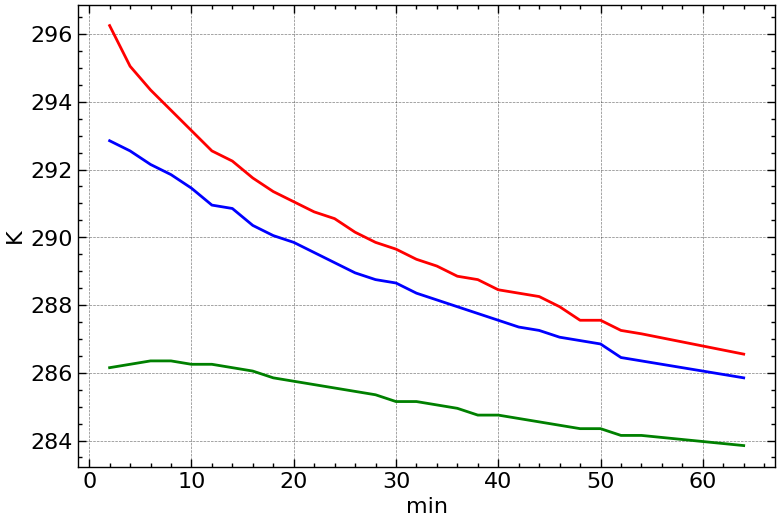

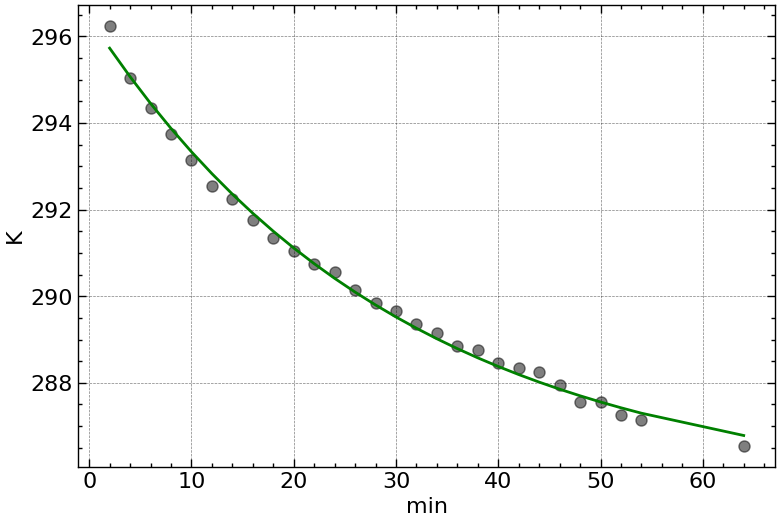

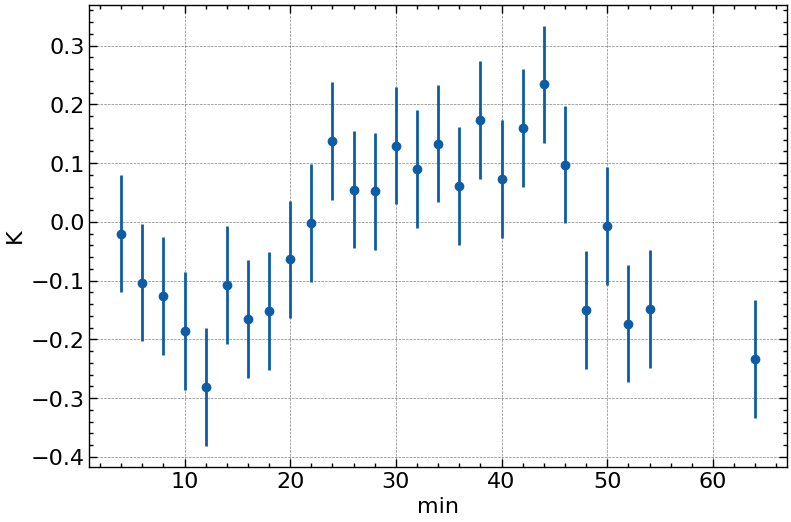

In [57]:
def expon(x, tau, ti , tf):
    return (( (tf - ti)*( 1.0 - np.exp(x/tau) ) +ti ))

c7 = rawData5b[7] + 273.15
c5 = rawData5b[5] + 273.15
c3 = rawData5b[3] + 273.15
c1 = rawData5b[1] + 273.15
dom = rawData5b['t']

fig1, ax1 = plt.subplots(1,1,figsize=(9,6))
fig2, ax2 = plt.subplots(1,1,figsize=(9,6))
fig3, ax3 = plt.subplots(1,1,figsize=(9,6))

popt, pcov = curve_fit(expon, dom[1:], c1[1:], p0=(-30, 22, 12))

ax1.set_ylabel('K')
ax1.set_xlabel('min')
ax1.plot(dom[1:], c1[1:], color='red')
ax1.plot(dom[1:], c3[1:] , color='blue')
ax1.plot(dom[1:], c5[1:], color='green')

ax2.set_ylabel('K')
ax2.set_xlabel('min')
ax2.plot(dom[1:], c1[1:],'o', color='black', alpha=0.5, markersize=8)
ax2.plot(dom[1:], expon(dom[1:], *popt), color='green')

#RESIDUOS

ax3.set_ylabel('K')
ax3.set_xlabel('min')
res = c1 - expon(dom, *popt)
ax3.plot(dom[2:], res[2:], 'k.')
ax3.errorbar(dom[2:], res[2:], yerr=0.1, fmt='o')

fig1.savefig('ExpBajada.pdf')
fig2.savefig('AjusteBajada.pdf')
fig3.savefig('ResiduosBajada.pdf')

print ('EXPONENCIAL')
print ('tau', popt[0],'+-', np.sqrt(pcov[0,0]))
print ('ti', popt[1],'+-', np.sqrt(pcov[1,1]))
print ('tf', popt[2],'+-', np.sqrt(pcov[2,2]))





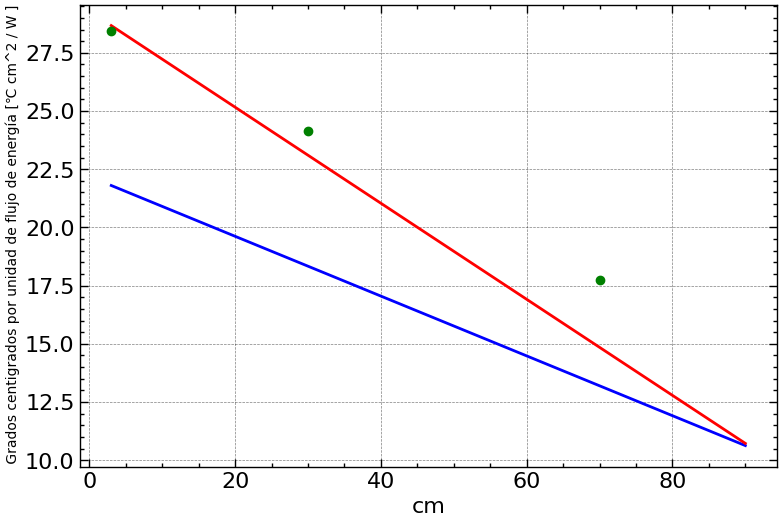

In [26]:



def lineal(x,m,b):
    return x*m+b

fig1, ax1 = plt.subplots(1,1,figsize=(9,6))
ax1.set_xlabel('cm')
ax1.set_ylabel(' Grados centigrados por unidad de flujo de energía [℃ cm^2 / W ]', fontsize= 10 ) 

ax1.plot(dist, lineal(dist, *L3), color='blue')
ax1.plot(dist, lineal(dist, *L5), color='red')
ax1.plot(distl, lineal(distl, *L4),'o', color='green')
